In [41]:
import pandas as pd

from openqaoa.problems import QUBO
from openqaoa import QAOA

From [QUBO's tutorial paper](https://arxiv.org/pdf/1811.11538.pdf)
\begin{align}
y = -5x_0 -3x_1 -8x_2 -6x_3 +4x_0x_1 +8x_0x_2 +2x_1x_2 +10x_2x_3
\end{align}

\begin{align}
        y =
        (x_0 \; x_1 \; x_2 \; x_3)
        \begin{pmatrix}
            -5 & 2 & 4 & 0\\ 
            2 & -3 & 1 & 0\\
            4 & 1 & -8 & 5\\
            0 & 0 & 5 & -6
        \end{pmatrix}
        \begin{pmatrix}
            x_0 \\ x_1 \\ x_2 \\ x_3
        \end{pmatrix}
\end{align}

In [31]:
terms = [[0], [1], [2], [3], [0,1], [0,2], [1,2], [2,3]]
weights = [-5, -3, -8, -6, 4, 8, 2, 10]

t, w = QUBO.convert_qubo_to_ising(4, terms, weights)
qubo1 = QUBO(n=4, terms=t, weights=w)
qubo1.asdict()

{'terms': [[0, 1], [0, 2], [1, 2], [2, 3], [0], [1], [2], [3]],
 'weights': [1.0, 2.0, 0.5, 2.5, -0.5, 0.0, -1.0, 0.5],
 'constant': -5.0,
 'n': 4,
 'problem_instance': {'problem_type': 'generic_qubo'},
 'metadata': {}}

The solution according to paper: $y$ = -11, $x_0$ = $x_3$ = 1, $x_1$ = $x_2$ = 0, so bitstring is 1001.

Solving the problem with QAOA with default configuration:

In [32]:
s1 = QAOA()
s1.compile(qubo1)
s1.optimize()
result = s1.result

In [33]:
result.optimized

{'angles': [0.390245733978, 0.212233126442],
 'cost': -8.15765481856,
 'measurement_outcomes': array([-0.08733993+0.01236069j,  0.05769584+0.17959816j,
        -0.02149037+0.06689411j,  0.09599443+0.13932576j,
         0.01534821+0.37065095j,  0.14360922+0.22492322j,
         0.0279795 +0.41487784j,  0.04392333+0.05701085j,
        -0.0202063 +0.1732929j , -0.10285887+0.41680635j,
        -0.04174684+0.36773539j, -0.1140582 +0.3224955j ,
         0.07945324+0.16036726j, -0.00718811-0.03121751j,
         0.02061482+0.14668092j, -0.08276477-0.07467105j]),
 'job_id': '73fb484b-7d3a-4706-ada7-6256fa9368d5',
 'eval_number': 34}

In [34]:
result.most_probable_states

{'solutions_bitstrings': ['1001'], 'bitstring_energy': -11.0}

states kept: 10


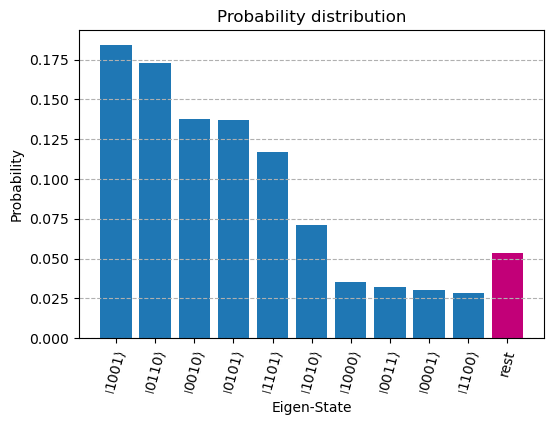

In [39]:
result.plot_probabilities(n_states_to_keep=10, figsize=(6, 4))

In [44]:
pd.DataFrame(result.lowest_cost_bitstrings(6))

,solutions_bitstrings,bitstrings_energies,probabilities
0,1001,-11.0,0.184307
1,1101,-10.0,0.117013
2,0110,-9.0,0.172906
3,0101,-9.0,0.136972
4,0010,-8.0,0.137618
5,0001,-6.0,0.030439


In [45]:
result.optimized

{'angles': [0.390245733978, 0.212233126442],
 'cost': -8.15765481856,
 'measurement_outcomes': array([-0.08733993+0.01236069j,  0.05769584+0.17959816j,
        -0.02149037+0.06689411j,  0.09599443+0.13932576j,
         0.01534821+0.37065095j,  0.14360922+0.22492322j,
         0.0279795 +0.41487784j,  0.04392333+0.05701085j,
        -0.0202063 +0.1732929j , -0.10285887+0.41680635j,
        -0.04174684+0.36773539j, -0.1140582 +0.3224955j ,
         0.07945324+0.16036726j, -0.00718811-0.03121751j,
         0.02061482+0.14668092j, -0.08276477-0.07467105j]),
 'job_id': '73fb484b-7d3a-4706-ada7-6256fa9368d5',
 'eval_number': 34}

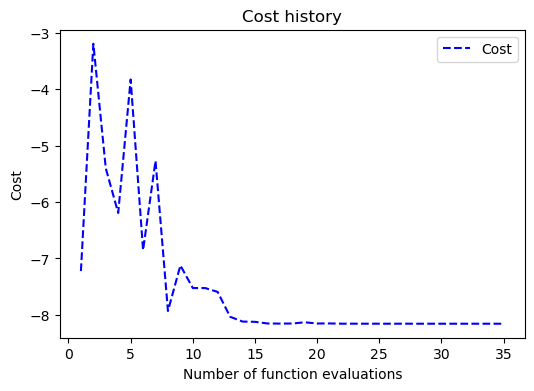

In [43]:
result.plot_cost(figsize=(6, 4))

Let's try another tool such as qubovert.

In [7]:
import qubovert as qv

In [8]:
Q = [[-5, 2, 4, 0],
     [2, -3, 1, 0],
     [4, 1, -8, 5], 
     [0, 0, 5, -6]]

In [26]:
q2 = qv.utils.matrix_to_qubo(Q)
s2 = qv.utils.solve_qubo_bruteforce(q2)

In [27]:
s2

(-11, {0: 1, 1: 0, 2: 0, 3: 1})

Here we got the exact solution as in paper.

Open questions

Q: Why do we have different results for y? -20 (OpenQAOA) vs -11 (qubovert)

A: Issue was in missing logic t, w = QUBO.convert_qubo_to_ising(4, terms, weights) where you have to convert QUBO formulation {0, 1} into Ising model {-1 , 1}. Something similar stated in documentation https://openqaoa.entropicalabs.com/problems/what-is-a-qubo/#how-to-write-a-qubo but without a concrete example.

Q: Why do we have such probability distribution? Shouldn't we have dominant state 1001 instead of step form?

Q: According to QUBO terminology objective function value can represent cost or profit value so I would expect to have cost value is equal to -11 but instead I see 'cost': -8.15765481856, from the other side, term 'bitstring_energy': -11.0 is precisely equal to our expectations and probably correspond to cost value. I thought that https://openqaoa.entropicalabs.com/making-sense-of-the-result/#the-intermediate-result might sheide more light to this.